# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
cities_split = [cities[i:i+50] for i in range(0,len(cities),50)]
raw_data = []
for segment in cities_split:
    for city in segment:
        try:
            url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=imperial"
            response = requests.get(url).json()
            raw_data.append(
                        {   
                            "City": response["name"],
                            "Lat" : response["coord"]["lat"],
                            "Lng" : response["coord"]["lon"],
                            "Max Temp" : response["main"]["temp_max"], 
                            "Humidity" : response["main"]["humidity"], 
                            "Cloudiness" : response["clouds"]["all"], 
                            "Wind Speed" : response["wind"]["speed"], 
                            "Country" : response["sys"]["country"],
                            "Date" : response["dt"]
                        }
            )
            print(f"Processing Record {segment.index(city) + 1} of Set {(cities_split.index(segment) + 1)} | {city}")
        except KeyError:
            print("City not found. Skipping...")

Processing Record 1 of Set 1 | georgetown
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | victoria
Processing Record 4 of Set 1 | zemio
Processing Record 5 of Set 1 | dwarka
Processing Record 6 of Set 1 | turayf
City not found. Skipping...
City not found. Skipping...
Processing Record 9 of Set 1 | kapaa
Processing Record 10 of Set 1 | puerto ayora
Processing Record 11 of Set 1 | bredasdorp
Processing Record 12 of Set 1 | tahe
Processing Record 13 of Set 1 | kondinskoye
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | bambous virieux
Processing Record 16 of Set 1 | rikitea
City not found. Skipping...
Processing Record 18 of Set 1 | jijiga
Processing Record 19 of Set 1 | jamestown
Processing Record 20 of Set 1 | bluff
Processing Record 21 of Set 1 | deniliquin
Processing Record 22 of Set 1 | bengkulu
Processing Record 23 of Set 1 | kaitangata
Processing Record 24 of Set 1 | paso de carrasco
Processing Record 25 of Set 1 | goderich
Processing R

Processing Record 12 of Set 9 | necochea
Processing Record 13 of Set 9 | southbridge
Processing Record 14 of Set 9 | lucea
Processing Record 15 of Set 9 | davila
Processing Record 16 of Set 9 | aldama
Processing Record 17 of Set 9 | bowen
City not found. Skipping...
Processing Record 19 of Set 9 | severo-kurilsk
Processing Record 20 of Set 9 | wawa
Processing Record 21 of Set 9 | port hueneme
Processing Record 22 of Set 9 | bissora
Processing Record 23 of Set 9 | iqaluit
Processing Record 24 of Set 9 | masuguru
City not found. Skipping...
Processing Record 26 of Set 9 | laon
Processing Record 27 of Set 9 | vardo
Processing Record 28 of Set 9 | ishigaki
Processing Record 29 of Set 9 | thinadhoo
Processing Record 30 of Set 9 | peno
Processing Record 31 of Set 9 | compuertas
Processing Record 32 of Set 9 | milkovo
Processing Record 33 of Set 9 | zaozerne
Processing Record 34 of Set 9 | toba
Processing Record 35 of Set 9 | atocha
Processing Record 36 of Set 9 | takoradi
Processing Record 3

Processing Record 13 of Set 13 | abong mbang
Processing Record 14 of Set 13 | varna
Processing Record 15 of Set 13 | abha
Processing Record 16 of Set 13 | dhidhdhoo
Processing Record 17 of Set 13 | krasnoselkup
Processing Record 18 of Set 13 | inirida
Processing Record 19 of Set 13 | san cristobal
City not found. Skipping...
Processing Record 21 of Set 13 | batavia
Processing Record 22 of Set 13 | ilhabela
Processing Record 23 of Set 13 | abrau-dyurso
Processing Record 24 of Set 13 | gayeri
Processing Record 25 of Set 13 | manggar
Processing Record 26 of Set 13 | marathon


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
data_df = pd.DataFrame(raw_data)
data_df.index.name = "City ID"
data_df["Date"] = pd.to_datetime(data_df["Date"], unit='s')
data_df.to_csv("../output_data/cities.csv")
data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City ID,,,,,,,,,
0,George Town,5.41,100.34,78.80,88,20,4.70,MY,2020-10-21 00:01:20
1,Mataura,-46.19,168.86,55.99,62,25,7.00,NZ,2020-10-21 00:04:03
2,Hong Kong,22.29,114.16,73.00,71,79,1.01,HK,2020-10-21 00:04:21
3,Zemio,5.03,25.14,71.02,93,100,1.74,CF,2020-10-21 00:08:02
4,Dwārka,22.24,68.97,83.26,79,0,7.65,IN,2020-10-21 00:06:04
...,...,...,...,...,...,...,...,...,...
572,Ilhabela,-23.78,-45.36,71.69,87,13,3.56,BR,2020-10-21 00:05:36
573,Abrau-Dyurso,44.69,37.59,44.60,75,40,4.47,RU,2020-10-21 00:10:15
574,Gayéri,12.65,0.49,84.63,38,16,5.46,BF,2020-10-21 00:10:15


In [5]:
data_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
count,577.000000,577.000000,577.000000,577.000000,577.00000,577.000000
mean,20.585529,18.747088,60.034125,74.152513,53.39688,7.371525
std,32.661301,88.714021,20.050225,20.775193,38.65176,5.075962
min,-54.800000,-179.170000,-0.400000,9.000000,0.00000,0.270000
25%,-5.090000,-58.740000,44.760000,65.000000,13.00000,3.560000
50%,25.020000,20.650000,64.110000,79.000000,62.00000,5.990000
75%,47.110000,100.300000,77.020000,89.000000,90.00000,10.290000
max,77.480000,179.320000,91.990000,100.000000,100.00000,28.010000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

No cities have humidity > 100% in my sample.

#Get the indices of cities that have humidity over 100%.


#Make a new DataFrame equal to the city data to drop all humidity outliers by index.
#Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

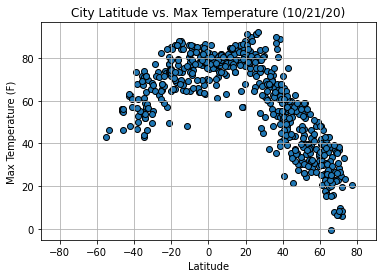

In [59]:
plt.scatter(data_df["Lat"], data_df["Max Temp"], edgecolors="black")
plt.xlim(-90,90)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature ("+ data_df.iloc[0]["Date"].strftime('%m/%d/%y') + ")")
plt.grid()
plt.savefig("../output_data/Fig1.png")
plt.show()

## Latitude vs. Humidity Plot

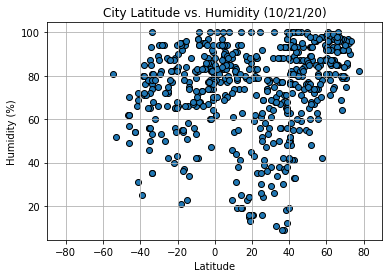

In [60]:
plt.scatter(data_df["Lat"], data_df["Humidity"], edgecolors="black")
plt.xlim(-90,90)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity ("+ data_df.iloc[0]["Date"].strftime('%m/%d/%y') + ")")
plt.grid()
plt.savefig("../output_data/Fig2.png")
plt.show()

## Latitude vs. Cloudiness Plot

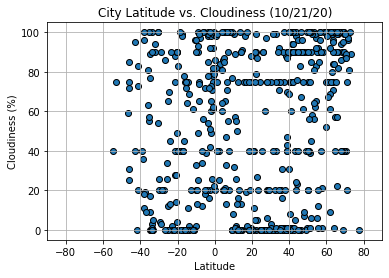

In [61]:
plt.scatter(data_df["Lat"], data_df["Cloudiness"], edgecolors="black")
plt.xlim(-90,90)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness ("+ data_df.iloc[0]["Date"].strftime('%m/%d/%y') + ")")
plt.grid()
plt.savefig("../output_data/Fig3.png")
plt.show()

## Latitude vs. Wind Speed Plot

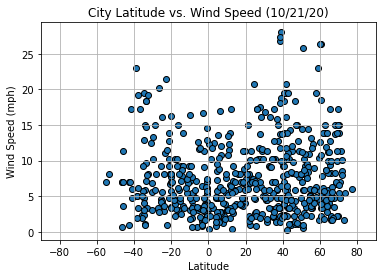

In [62]:
plt.scatter(data_df["Lat"], data_df["Wind Speed"], edgecolors="black")
plt.xlim(-90,90)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed ("+ data_df.iloc[0]["Date"].strftime('%m/%d/%y') + ")")
plt.grid()
plt.savefig("../output_data/Fig4.png")
plt.show()

## Linear Regression

In [75]:
nh_df = data_df[data_df["Lat"].ge(0)] 
sh_df = data_df[data_df["Lat"].lt(0)]
def linear_regression(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(0.50,0.01), xycoords='axes fraction',fontsize=15,color="red")
    plt.xlim
    plt.xlabel("Latitude")
    plt.ylabel(f"{y_values.name}")
    plt.title(f"City Latitude vs. {y_values.name} ({data_df.iloc[0]['Date'].strftime('%m/%d/%y')})")
    print(f"The r-squared is: {rvalue**2}")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7486952785728415


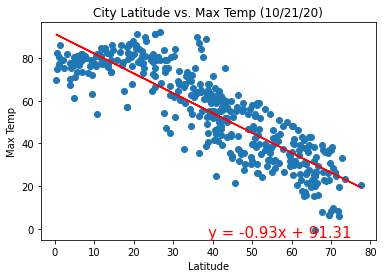

In [81]:
linear_regression(x_values = nh_df['Lat'], y_values = nh_df['Max Temp'])
plt.savefig("../output_data/Fig5.png")
plt.show()

# Latitude is highly correlated to the max temperature under a linear relationship.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.47488061250021446


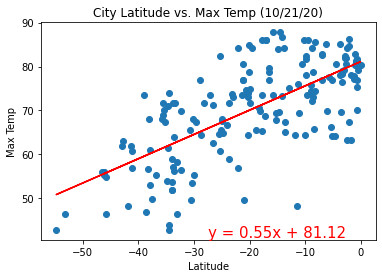

In [77]:
linear_regression(x_values = sh_df['Lat'], y_values = sh_df['Max Temp'])
plt.savefig("../output_data/Fig6.png")
plt.show()

# Latitude is highly correlated to the max temperature under a linear relationship.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0879815733478362


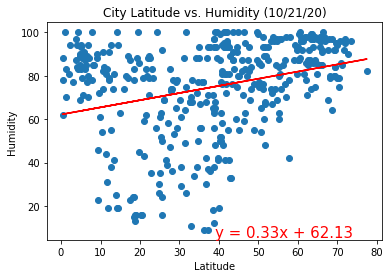

In [80]:
linear_regression(nh_df['Lat'], nh_df['Humidity'])
plt.savefig("../output_data/Fig7.png")
plt.show()

# Latitude is not well correlated to the humidity under a linear relationship.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.06500761162832361


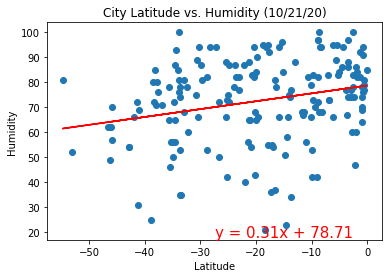

In [82]:
linear_regression(x_values = sh_df['Lat'], y_values = sh_df['Humidity'])
plt.savefig("../output_data/Fig8.png")
plt.show()

# Latitude is not well correlated to the humidity under a linear relationship.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.08491824068271062


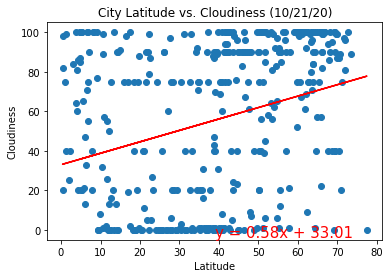

In [83]:
linear_regression(x_values = nh_df['Lat'], y_values = nh_df['Cloudiness'])
plt.savefig("../output_data/Fig9.png")
plt.show()

# Latitude is not correlated to the cloudiness under a linear relationship.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.03519512902092064


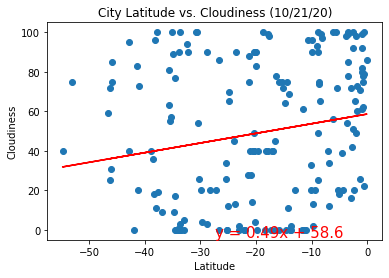

In [84]:
linear_regression(x_values = sh_df['Lat'], y_values = sh_df['Cloudiness'])
plt.savefig("../output_data/Fig10.png")
plt.show()

# Latitude is not correlated to the cloudiness under a linear relationship.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.011813934681594121


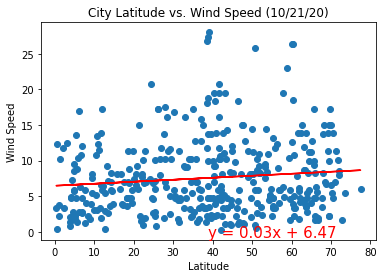

In [85]:
linear_regression(x_values = nh_df['Lat'], y_values = nh_df['Wind Speed'])
plt.savefig("../output_data/Fig11.png")
plt.show()

# Latitude is not correlated to the wind speed under a linear relationship.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.050057492157666736


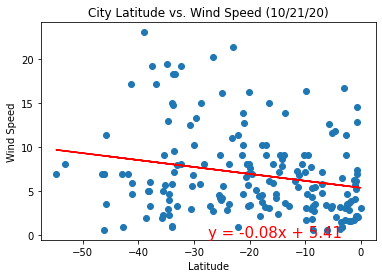

In [86]:
linear_regression(x_values = sh_df['Lat'], y_values = sh_df['Wind Speed'])
plt.savefig("../output_data/Fig12.png")
plt.show()

# Latitude is not correlated to the wind speed under a linear relationship.